In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Importing Data
path = os.getcwd() 
os.chdir('../ex1-MATLAB/')
path = os.path.abspath(os.curdir) + '/ex1data1.txt'

data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


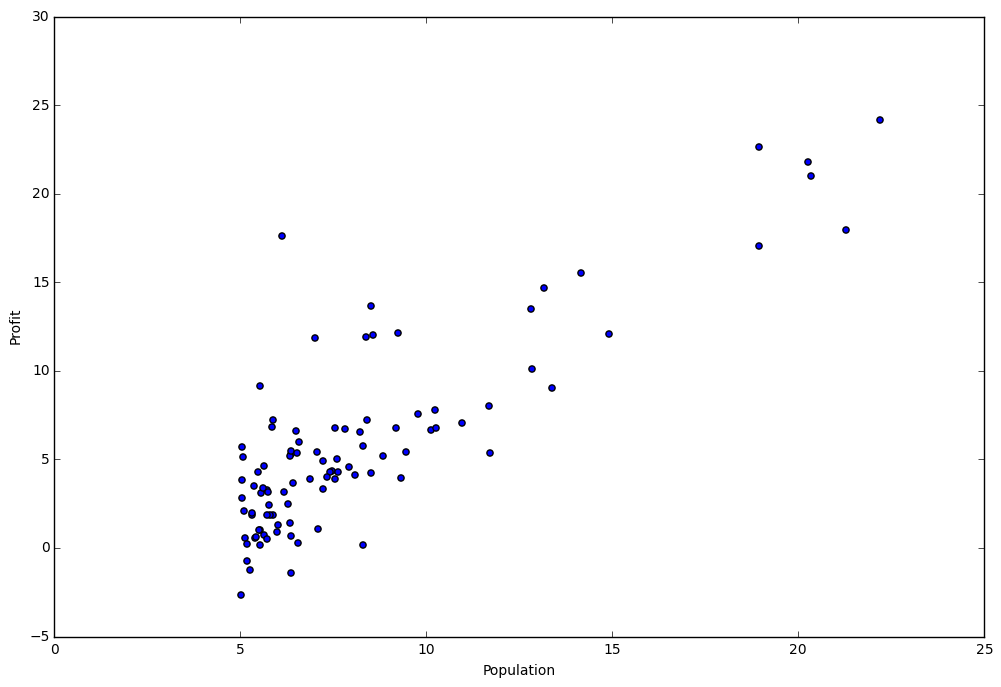

In [20]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [21]:
def computeCost(X, y, theta):
    sumInner = np.power(((X * theta.T)-y),2)
    return np.sum(sumInner) / (2 * len(X))

In [22]:
data.insert(0, 'Ones', 1)

In [7]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [10]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [11]:
computeCost(X, y, theta)

32.072733877455676

In [96]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        term = np.dot(X.T, error)
        theta = theta - np.multiply((alpha/len(X)),term.T)
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [97]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [98]:
computeCost(X, y, g)

4.5159555030789118

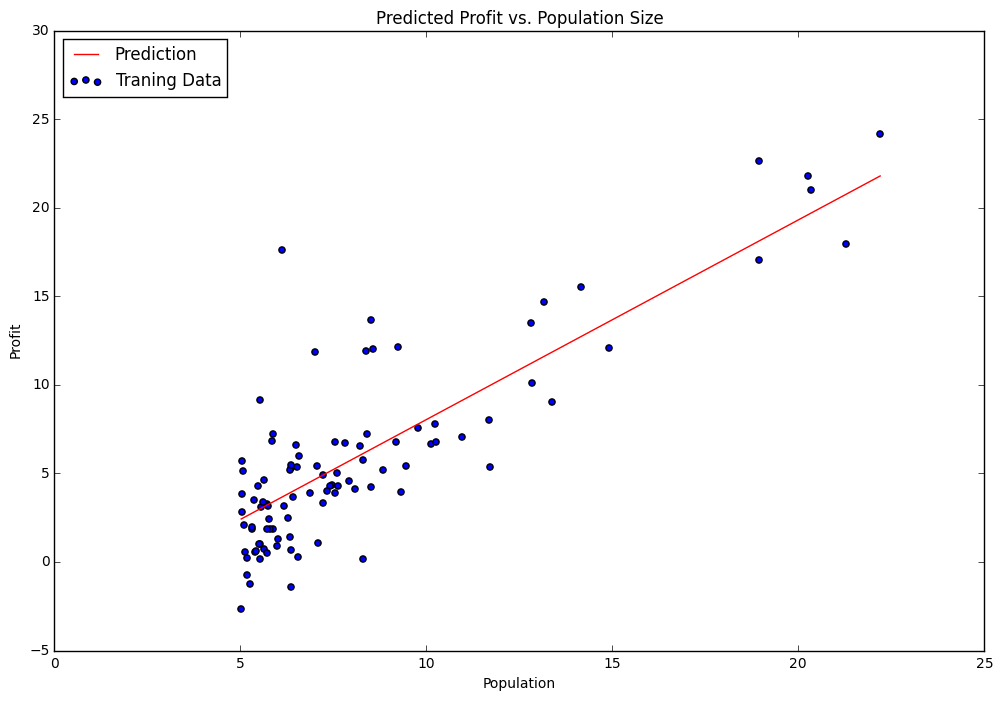

In [99]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

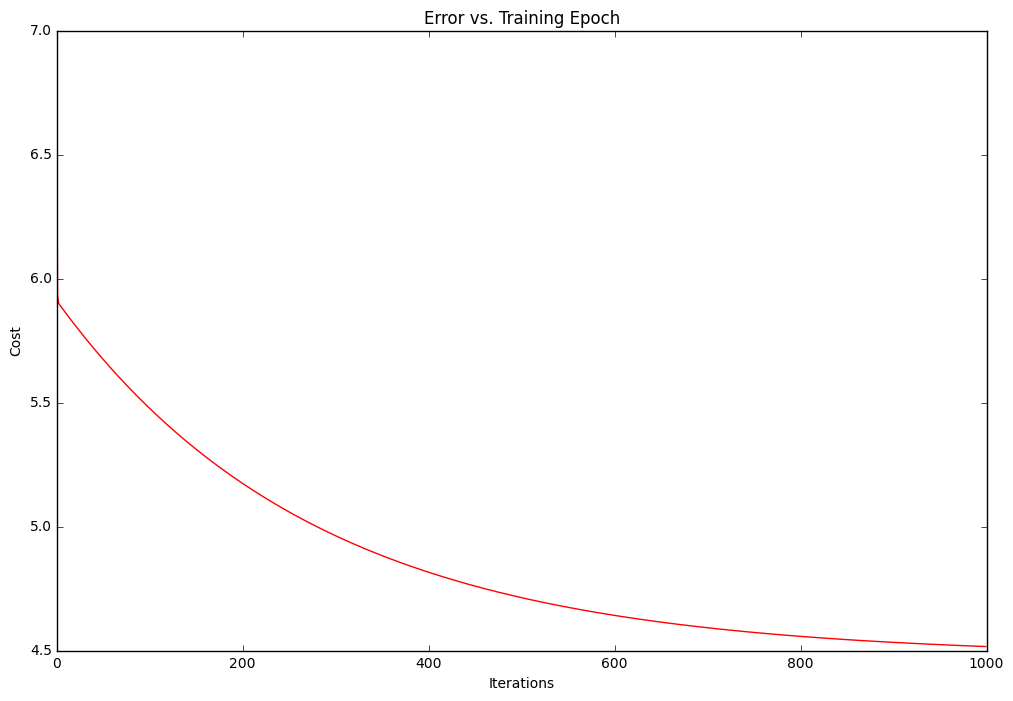

In [95]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')